# Custom Training: Basics

In [1]:
import tensorflow as tf
import gc

tf.enable_eager_execution()

In [2]:
# Using python state
x = tf.zeros([10,10])
x += 2 # Not mutating 'x' but performing the operation 'x = x + 2'

print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


Tensorflow Variable Objects

In [7]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0

# Re-assign the value
v.assign(3.0)
assert v.numpy() == 3.0

# Use 'v' in a TensorFlow operation like tf.square() and reassign
v.assign(tf.square(v))
assert v.numpy() == 9.0

## Example : Fitting a linear model

Define a model

In [ ]:
class Model(object):
    def __init__(self):
        # Initialize variable to (5.0, 0.0)
        # In practice, these should be initialized to random values
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
    
    def __call__(self, x):
        return self.W * x + self.b

model = Model()

assert model(3.0).numpy() == 15.0

Define a loss function

In [13]:
# Standard L2 loss function
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

Obtain training data

In [14]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random_normal(shape=[NUM_EXAMPLES])
noise = tf.random_normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise 

Plot how the untrained model performs. The models predictions are in red and the actual values are in blue.

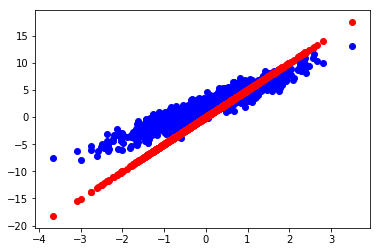

Current loss: 
9.468303


In [20]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: ')
print(loss(model(inputs), outputs).numpy())

Define a training loop

In [21]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

Train model

Epoch  0: W=5.00 b=0.00, loss=9.46830
Epoch  1: W=4.57 b=0.41, loss=6.26364
Epoch  2: W=4.23 b=0.74, loss=4.26859
Epoch  3: W=3.96 b=1.00, loss=3.02633
Epoch  4: W=3.75 b=1.21, loss=2.25264
Epoch  5: W=3.59 b=1.37, loss=1.77068
Epoch  6: W=3.46 b=1.51, loss=1.47039
Epoch  7: W=3.36 b=1.61, loss=1.28324
Epoch  8: W=3.28 b=1.69, loss=1.16658
Epoch  9: W=3.22 b=1.76, loss=1.09385


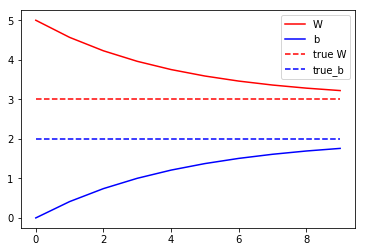

In [24]:
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)
    
    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
         (epoch, Ws[-1], bs[-1], current_loss))

# Plot everything
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()